High-definition spatial transcriptomics for in situ tissue profiling

ShortName: Vickovic2019high

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://portals.broadinstitute.org/single_cell/study/SCP420

In [ ]:
# this is the data released from HDST original paper

In [ ]:
# file format:
# bc	spot_px_x	spot_px_y	gene	count	segment_id	segment_px_x	segment_px_y
# 1	1000x103	9294	1673	DPT	1	42961	9302.96254256527	5916.34960272418
# 2	1000x103	9294	1673	RPLP2	1	42961	9302.96254256527	5916.34960272418
# 3	1000x126	9290	1843	GATAD2B	1	41676	9288.21699196326	5752.0757749713
# 4	1000x126	9290	1843	ILF2	1	41676	9288.21699196326	5752.0757749713
# 5	1000x126	9290	1843	FASTK	1	41676	9288.21699196326	5752.0757749713
# 6	1000x126	9290	1843	CXXC5	1	41676	9288.21699196326	5752.0757749713
# 7	1000x128	9290	1857	RPLP2	1	41676	9288.21699196326	5752.0757749713
# 8	1000x165	9293	2131	ACTB	1	39330	9291.97672413793	5453.85517241379
# 9	1000x165	9293	2131	SCP2	1	39330	9291.97672413793	5453.85517241379



# take one sample as an example

In [66]:
import pandas as pd
import numpy as np
from scipy import sparse
import scanpy as sc
import anndata 

In [2]:
path = '/home/yzy/PUBDT/st/HDST'

In [7]:
raw = pd.read_csv(f'{path}/brain/MOB_CN13D2.tsv',delimiter='\t')

In [12]:
raw

,bc,spot_px_x,spot_px_y,gene,count,segment_id,segment_px_x,segment_px_y
1,1000x149,9374.790632,2032.615023,Txn2,1,41026,9369.085181,2018.403734
2,1000x204,9379.257477,2437.913155,Mapk8ip2,1,37901,9371.744115,2423.280450
3,1000x228,9379.338149,2614.771375,Cox6a1,1,36308,9384.527007,2626.424818
4,1000x230,9379.344872,2629.509560,Fam189a2,1,36308,9384.527007,2626.424818
5,1000x230,9379.344872,2629.509560,Eloc,1,36308,9384.527007,2626.424818
...,...,...,...,...,...,...,...,...
246227,999x780,9372.629679,6682.514321,Gls,1,3639,9377.635612,6694.500376
246228,999x780,9372.629679,6682.514321,Pip5k1c,1,3639,9377.635612,6694.500376
246229,999x780,9372.629679,6682.514321,Trnp1,1,3639,9377.635612,6694.500376
246230,999x781,9368.351070,6689.885367,Pex1,2,3639,9377.635612,6694.500376


In [13]:
np.unique(raw[['segment_id']]).shape

(33749,)

In [14]:
np.unique(raw[['bc']]).shape

(76344,)

In [89]:
raw.groupby('bc').agg('sum')

/tmp/ipykernel_1029308/237572261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw.groupby('bc').agg('sum')


,spot_px_x,spot_px_y,count,segment_id,segment_px_x,segment_px_y
bc,,,,,,
1000x149,9374.790632,2032.615023,1,41026,9369.085181,2018.403734
1000x204,9379.257477,2437.913155,1,37901,9371.744115,2423.280450
1000x228,9379.338149,2614.771375,1,36308,9384.527007,2626.424818
1000x230,18758.689744,5259.019119,2,72616,18769.054015,5252.849635
1000x273,18750.414881,5892.764977,2,67396,18738.708934,5916.515850
...,...,...,...,...,...,...
999x771,9368.317457,6616.194442,1,4032,9367.641286,6624.367174
999x773,37473.296717,26523.730509,4,16128,37470.565144,26497.468697
999x778,9372.622956,6667.776136,1,3841,9365.551435,6662.886364


In [90]:
cell_gene_df = raw.groupby(['segment_id','gene']).agg('sum')[['count']]

/tmp/ipykernel_1029308/328803365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cell_gene_df = raw.groupby(['segment_id','gene']).agg('sum')[['count']]


In [91]:
cell_gene_df

count
segment_id gene          
3470       Apoe         1
           Gm20754      1
           Sh3gl2       1
3480       Amn1         1
           Ppp2r1a      1
...                   ...
48656      Pum1         1
           Syp          1
           Yars         1
           Zfp266       1
48678      Pitpna       1

[246148 rows x 1 columns]

In [92]:
cell_list = [cg[0] for cg in cell_gene_df.index]
gene_list = [cg[1] for cg in cell_gene_df.index]
val_list = cell_gene_df[['count']].values[:,0]

In [93]:
var_names = list(np.unique(gene_list))
obs_names = list(np.unique(cell_list))

In [94]:
cell_idx = [obs_names.index(cl) for cl in cell_list]
gene_idx = [var_names.index(gl) for gl in gene_list]

In [95]:
X = sparse.coo_matrix((val_list,(cell_idx,gene_idx)))

In [96]:
adata = anndata.AnnData(X=X)
adata.var_names = var_names
adata.obs_names = obs_names



/tmp/ipykernel_1029308/2967011719.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=X)
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [3470, 3480, 3497, 3498, 3507]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


In [98]:
raw

,bc,spot_px_x,spot_px_y,gene,count,segment_id,segment_px_x,segment_px_y
1,1000x149,9374.790632,2032.615023,Txn2,1,41026,9369.085181,2018.403734
2,1000x204,9379.257477,2437.913155,Mapk8ip2,1,37901,9371.744115,2423.280450
3,1000x228,9379.338149,2614.771375,Cox6a1,1,36308,9384.527007,2626.424818
4,1000x230,9379.344872,2629.509560,Fam189a2,1,36308,9384.527007,2626.424818
5,1000x230,9379.344872,2629.509560,Eloc,1,36308,9384.527007,2626.424818
...,...,...,...,...,...,...,...,...
246227,999x780,9372.629679,6682.514321,Gls,1,3639,9377.635612,6694.500376
246228,999x780,9372.629679,6682.514321,Pip5k1c,1,3639,9377.635612,6694.500376
246229,999x780,9372.629679,6682.514321,Trnp1,1,3639,9377.635612,6694.500376
246230,999x781,9368.351070,6689.885367,Pex1,2,3639,9377.635612,6694.500376


In [99]:
spatial_df = raw.groupby('segment_id').agg('median')

/tmp/ipykernel_1029308/3586693718.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spatial_df = raw.groupby('segment_id').agg('median')


In [100]:
list(adata.obs_names)

[3470,
 3480,
 3497,
 3498,
 3507,
 3509,
 3512,
 3513,
 3514,
 3516,
 3517,
 3518,
 3521,
 3522,
 3526,
 3527,
 3528,
 3529,
 3530,
 3533,
 3534,
 3535,
 3536,
 3540,
 3542,
 3545,
 3547,
 3549,
 3552,
 3553,
 3554,
 3555,
 3556,
 3557,
 3559,
 3561,
 3563,
 3564,
 3565,
 3569,
 3571,
 3572,
 3573,
 3574,
 3575,
 3577,
 3580,
 3583,
 3587,
 3588,
 3589,
 3590,
 3592,
 3593,
 3594,
 3595,
 3596,
 3597,
 3598,
 3599,
 3600,
 3601,
 3604,
 3607,
 3608,
 3609,
 3610,
 3611,
 3612,
 3613,
 3614,
 3615,
 3616,
 3617,
 3620,
 3622,
 3623,
 3624,
 3625,
 3626,
 3627,
 3628,
 3629,
 3630,
 3632,
 3633,
 3634,
 3635,
 3636,
 3638,
 3639,
 3641,
 3643,
 3644,
 3645,
 3646,
 3648,
 3649,
 3650,
 3651,
 3652,
 3653,
 3654,
 3657,
 3658,
 3659,
 3660,
 3661,
 3662,
 3663,
 3665,
 3666,
 3667,
 3668,
 3671,
 3672,
 3674,
 3675,
 3676,
 3677,
 3678,
 3679,
 3680,
 3681,
 3683,
 3684,
 3685,
 3686,
 3688,
 3689,
 3690,
 3692,
 3693,
 3694,
 3695,
 3696,
 3697,
 3698,
 3699,
 3700,
 3701,
 3702,
 3703,

In [101]:
spatial_mat = spatial_df.loc[list(adata.obs_names)][['segment_px_x','segment_px_y']].values

In [102]:
adata.obsm['spatial'] = spatial_mat

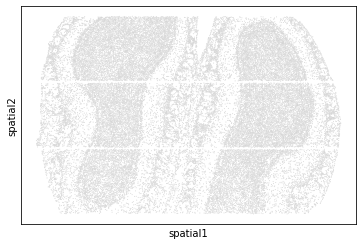

In [105]:
sc.pl.embedding(adata,basis='spatial')

# run all for benchmark

In [111]:
import time
import tracemalloc

time_list = []
mem_list = []
dataset_list = []

In [107]:
data_list = ['brain/MOB_CN13D2.tsv','brain/MOB_CN24E1.tsv',
            'BC/BC_CN21C1.tsv','BC/BC_CN21D1.tsv','BC/BC_CN21E2.tsv']

/tmp/ipykernel_1029308/2834809068.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cell_gene_df = raw.groupby(['segment_id','gene']).agg('sum')[['count']]
/tmp/ipykernel_1029308/2834809068.py:21: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=sparse.csr_matrix(X))
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [3470, 3480, 3497, 3498, 3507]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/tmp/ipykernel_1029308/283480906

MOB_CN13D2 148.13417077064514 (116324493, 121229343)


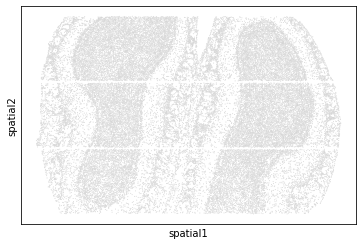

/tmp/ipykernel_1029308/2834809068.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cell_gene_df = raw.groupby(['segment_id','gene']).agg('sum')[['count']]
/tmp/ipykernel_1029308/2834809068.py:21: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=sparse.csr_matrix(X))
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [2815, 2858, 2861, 2880, 2884]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/tmp/ipykernel_1029308/283480906

MOB_CN24E1 305.2232964038849 (305774710, 331194876)


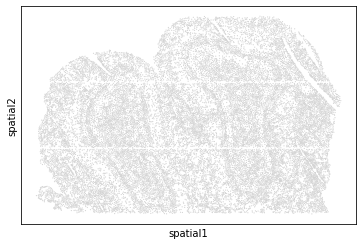

/tmp/ipykernel_1029308/2834809068.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cell_gene_df = raw.groupby(['segment_id','gene']).agg('sum')[['count']]
/tmp/ipykernel_1029308/2834809068.py:21: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=sparse.csr_matrix(X))
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [3419, 3421, 3427, 3434, 3449]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/tmp/ipykernel_1029308/283480906

BC_CN21C1 221.28207874298096 (167907371, 197880435)


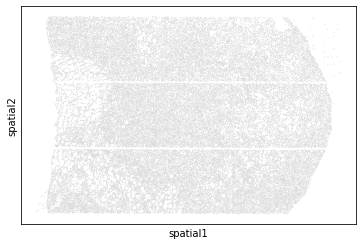

/tmp/ipykernel_1029308/2834809068.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cell_gene_df = raw.groupby(['segment_id','gene']).agg('sum')[['count']]
/tmp/ipykernel_1029308/2834809068.py:21: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=sparse.csr_matrix(X))
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [5776, 5801, 5819, 5822, 5828]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/tmp/ipykernel_1029308/283480906

BC_CN21D1 166.0062255859375 (133763498, 156229292)


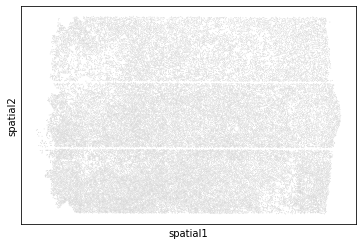

/tmp/ipykernel_1029308/2834809068.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cell_gene_df = raw.groupby(['segment_id','gene']).agg('sum')[['count']]
/tmp/ipykernel_1029308/2834809068.py:21: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=sparse.csr_matrix(X))
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/anndata/_core/anndata.py:872: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [6218, 6241, 6245, 6279, 6312]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")
/tmp/ipykernel_1029308/283480906

BC_CN21E2 465.3025140762329 (239850855, 287688402)


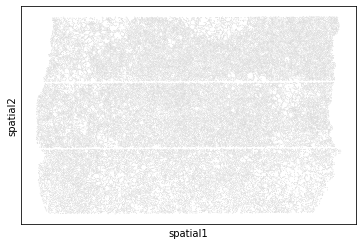

In [119]:
for sample_file in data_list:
    tracemalloc.start()
    time_st = time.time()
    
    sample_name = sample_file.split('/')[1][:-4]
    raw = pd.read_csv(f'{path}/{sample_file}',delimiter='\t')
    cell_gene_df = raw.groupby(['segment_id','gene']).agg('sum')[['count']]

    cell_list = [cg[0] for cg in cell_gene_df.index]
    gene_list = [cg[1] for cg in cell_gene_df.index]
    val_list = cell_gene_df[['count']].values[:,0]

    var_names = list(np.unique(gene_list))
    obs_names = list(np.unique(cell_list))

    cell_idx = [obs_names.index(cl) for cl in cell_list]
    gene_idx = [var_names.index(gl) for gl in gene_list]

    X = sparse.coo_matrix((val_list,(cell_idx,gene_idx)))

    adata = anndata.AnnData(X=sparse.csr_matrix(X))
    adata.var_names = var_names
    adata.obs_names = obs_names

    spatial_df = raw.groupby('segment_id').agg('median')

    spatial_mat = spatial_df.loc[list(adata.obs_names)][['segment_px_x','segment_px_y']].values


    adata.obsm['spatial'] = spatial_mat

    
    cur_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    time_ed = time.time()
    cur_time = time_ed-time_st
    
    time_list.append(cur_time)
    mem_list.append(cur_mem)

    dataset_list.append(sample_name)
    print(sample_name,cur_time,cur_mem)


    sc.pl.embedding(adata,basis='spatial')
    adata.write_h5ad(f'{sample_name}.h5ad')
    

In [120]:
time_list

[149.4391508102417,
 148.13417077064514,
 305.2232964038849,
 221.28207874298096,
 166.0062255859375,
 465.3025140762329]

In [122]:
mem_list

[(119111831, 124016758),
 (116324493, 121229343),
 (305774710, 331194876),
 (167907371, 197880435),
 (133763498, 156229292),
 (239850855, 287688402)]

### time and memory cost of loading SODB data

In [123]:
import pysodb

In [124]:
time_list_sodb = []
mem_list_sodb = []
dataset_list_sodb = []
sodb = pysodb.SODB() # Initialization
data_list = ['GSM4067525_CN24_E1_hdst','GSM4067523_CN13_D2_hdst','GSM4067524_CN24_D1_hdst']
for sample in data_list:
    tracemalloc.start()
    time_st = time.time()
    adata = sodb.load_experiment('Vickovic2019high',sample)
    
    cur_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    time_ed = time.time()
    cur_time = time_ed-time_st
    
    time_list_sodb.append(cur_time)
    mem_list_sodb.append(cur_mem)

    dataset_list_sodb.append(sample)
    print(sample,cur_time,cur_mem)



/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/urllib3-1.26.12-py3.9.egg/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gene.ai.tencent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


download experiment[GSM4067525_CN24_E1_hdst] in dataset[Vickovic2019high]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47.2M/47.2M [00:07<00:00, 6.51MB/s]


load experiment[GSM4067525_CN24_E1_hdst] in dataset[Vickovic2019high] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/Vickovic2019high/GSM4067525_CN24_E1_hdst.h5ad
GSM4067525_CN24_E1_hdst 8.21994137763977 (57021722, 57025459)
download experiment[GSM4067523_CN13_D2_hdst] in dataset[Vickovic2019high]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38.8M/38.8M [00:06<00:00, 6.09MB/s]


load experiment[GSM4067523_CN13_D2_hdst] in dataset[Vickovic2019high] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/Vickovic2019high/GSM4067523_CN13_D2_hdst.h5ad
GSM4067523_CN13_D2_hdst 7.236538887023926 (47482976, 47486713)
download experiment[GSM4067524_CN24_D1_hdst] in dataset[Vickovic2019high]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51.4M/51.4M [00:08<00:00, 6.05MB/s]


load experiment[GSM4067524_CN24_D1_hdst] in dataset[Vickovic2019high] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/Vickovic2019high/GSM4067524_CN24_D1_hdst.h5ad
GSM4067524_CN24_D1_hdst 9.605777025222778 (61385203, 61388940)


In [125]:
time_list_sodb

[8.21994137763977, 7.236538887023926, 9.605777025222778]

In [126]:
mem_list_sodb

[(57021722, 57025459), (47482976, 47486713), (61385203, 61388940)]

### time and memory cost of loading SODB data (preload)

In [128]:
time_list_sodb_pre = []
mem_list_sodb_pre = []
dataset_list_sodb_pre = []
sodb = pysodb.SODB() # Initialization
data_list = ['GSM4067525_CN24_E1_hdst','GSM4067523_CN13_D2_hdst','GSM4067524_CN24_D1_hdst']


for sample in data_list:
    tracemalloc.start()
    time_st = time.time()
    adata = sodb.load_experiment('Vickovic2019high',sample)
    
    cur_mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    time_ed = time.time()
    cur_time = time_ed-time_st
    
    time_list_sodb_pre.append(cur_time)
    mem_list_sodb_pre.append(cur_mem)

    dataset_list_sodb_pre.append(sample)
    print(sample,cur_time,cur_mem)




/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/urllib3-1.26.12-py3.9.egg/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gene.ai.tencent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


load experiment[GSM4067525_CN24_E1_hdst] in dataset[Vickovic2019high] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/Vickovic2019high/GSM4067525_CN24_E1_hdst.h5ad
GSM4067525_CN24_E1_hdst 0.4584171772003174 (58494176, 58497913)
load experiment[GSM4067523_CN13_D2_hdst] in dataset[Vickovic2019high] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/Vickovic2019high/GSM4067523_CN13_D2_hdst.h5ad
GSM4067523_CN13_D2_hdst 0.364030122756958 (47473408, 47477145)
load experiment[GSM4067524_CN24_D1_hdst] in dataset[Vickovic2019high] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/Vickovic2019high/GSM4067524_CN24_D1_hdst.h5ad
GSM4067524_CN24_D1_hdst 0.4706101417541504 (61380412, 61384149)


In [129]:
time_list_sodb_pre

[0.4584171772003174, 0.364030122756958, 0.4706101417541504]

In [130]:
mem_list_sodb_pre

[(58494176, 58497913), (47473408, 47477145), (61380412, 61384149)]

## compare

In [131]:
pd_dict = {
    'method':[],
    'time':[],
    'memory':[],
    'sample':[]
}
pd_dict['time'].extend(time_list)
pd_dict['memory'].extend([m[1] for m in mem_list])
pd_dict['method'].extend(['RawLoad']*len(mem_list))
pd_dict['sample'].extend(dataset_list)

pd_dict['time'].extend(time_list_sodb)
pd_dict['memory'].extend([m[1] for m in mem_list_sodb])
pd_dict['method'].extend(['SODBLoad']*len(mem_list_sodb))
pd_dict['sample'].extend(dataset_list_sodb)

pd_dict['time'].extend(time_list_sodb_pre)
pd_dict['memory'].extend([m[1] for m in mem_list_sodb_pre])
pd_dict['method'].extend(['SODBLoad(preload)']*len(mem_list_sodb_pre))
pd_dict['sample'].extend(dataset_list_sodb_pre)



In [132]:
pd_df = pd.DataFrame(pd_dict)

In [133]:
pd_df.to_feather('benchmark_time_mem.feather')

In [134]:
import seaborn as sns

In [135]:
pd_df

,method,time,memory,sample
0,RawLoad,149.439151,124016758,MOB_CN13D2
1,RawLoad,148.134171,121229343,MOB_CN13D2
2,RawLoad,305.223296,331194876,MOB_CN24E1
3,RawLoad,221.282079,197880435,BC_CN21C1
4,RawLoad,166.006226,156229292,BC_CN21D1
5,RawLoad,465.302514,287688402,BC_CN21E2
6,SODBLoad,8.219941,57025459,GSM4067525_CN24_E1_hdst
7,SODBLoad,7.236539,47486713,GSM4067523_CN13_D2_hdst
8,SODBLoad,9.605777,61388940,GSM4067524_CN24_D1_hdst
9,SODBLoad(preload),0.458417,58497913,GSM4067525_CN24_E1_hdst


In [136]:
import SOView
import numpy as np

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.2 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
squidpy==1.1.2


<AxesSubplot:xlabel='method', ylabel='memory'>

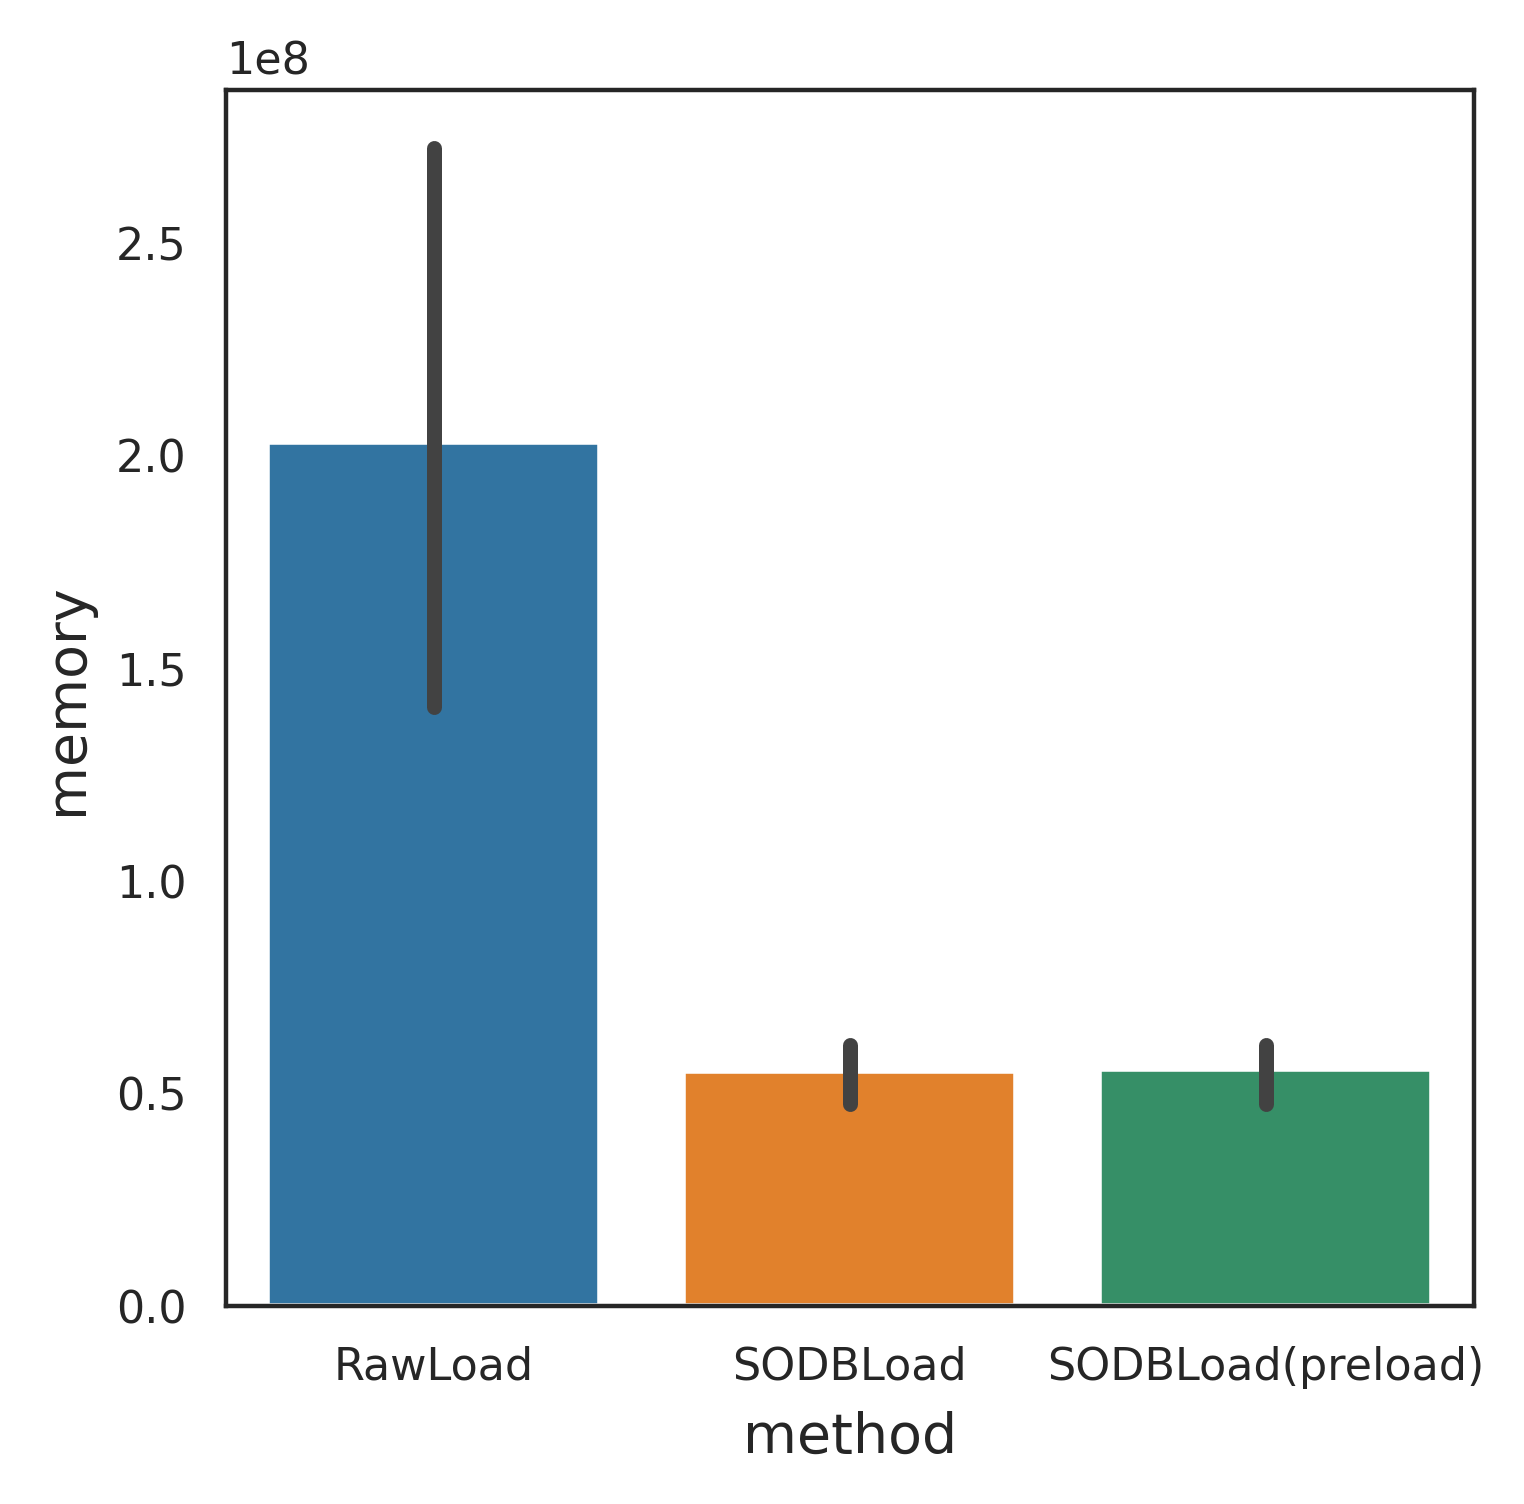

In [137]:
sns.barplot(data=pd_df,x='method',y='memory')

In [138]:
pd_df[['mem_log']] = np.log10(pd_df[['memory']])

<AxesSubplot:xlabel='method', ylabel='mem_log'>

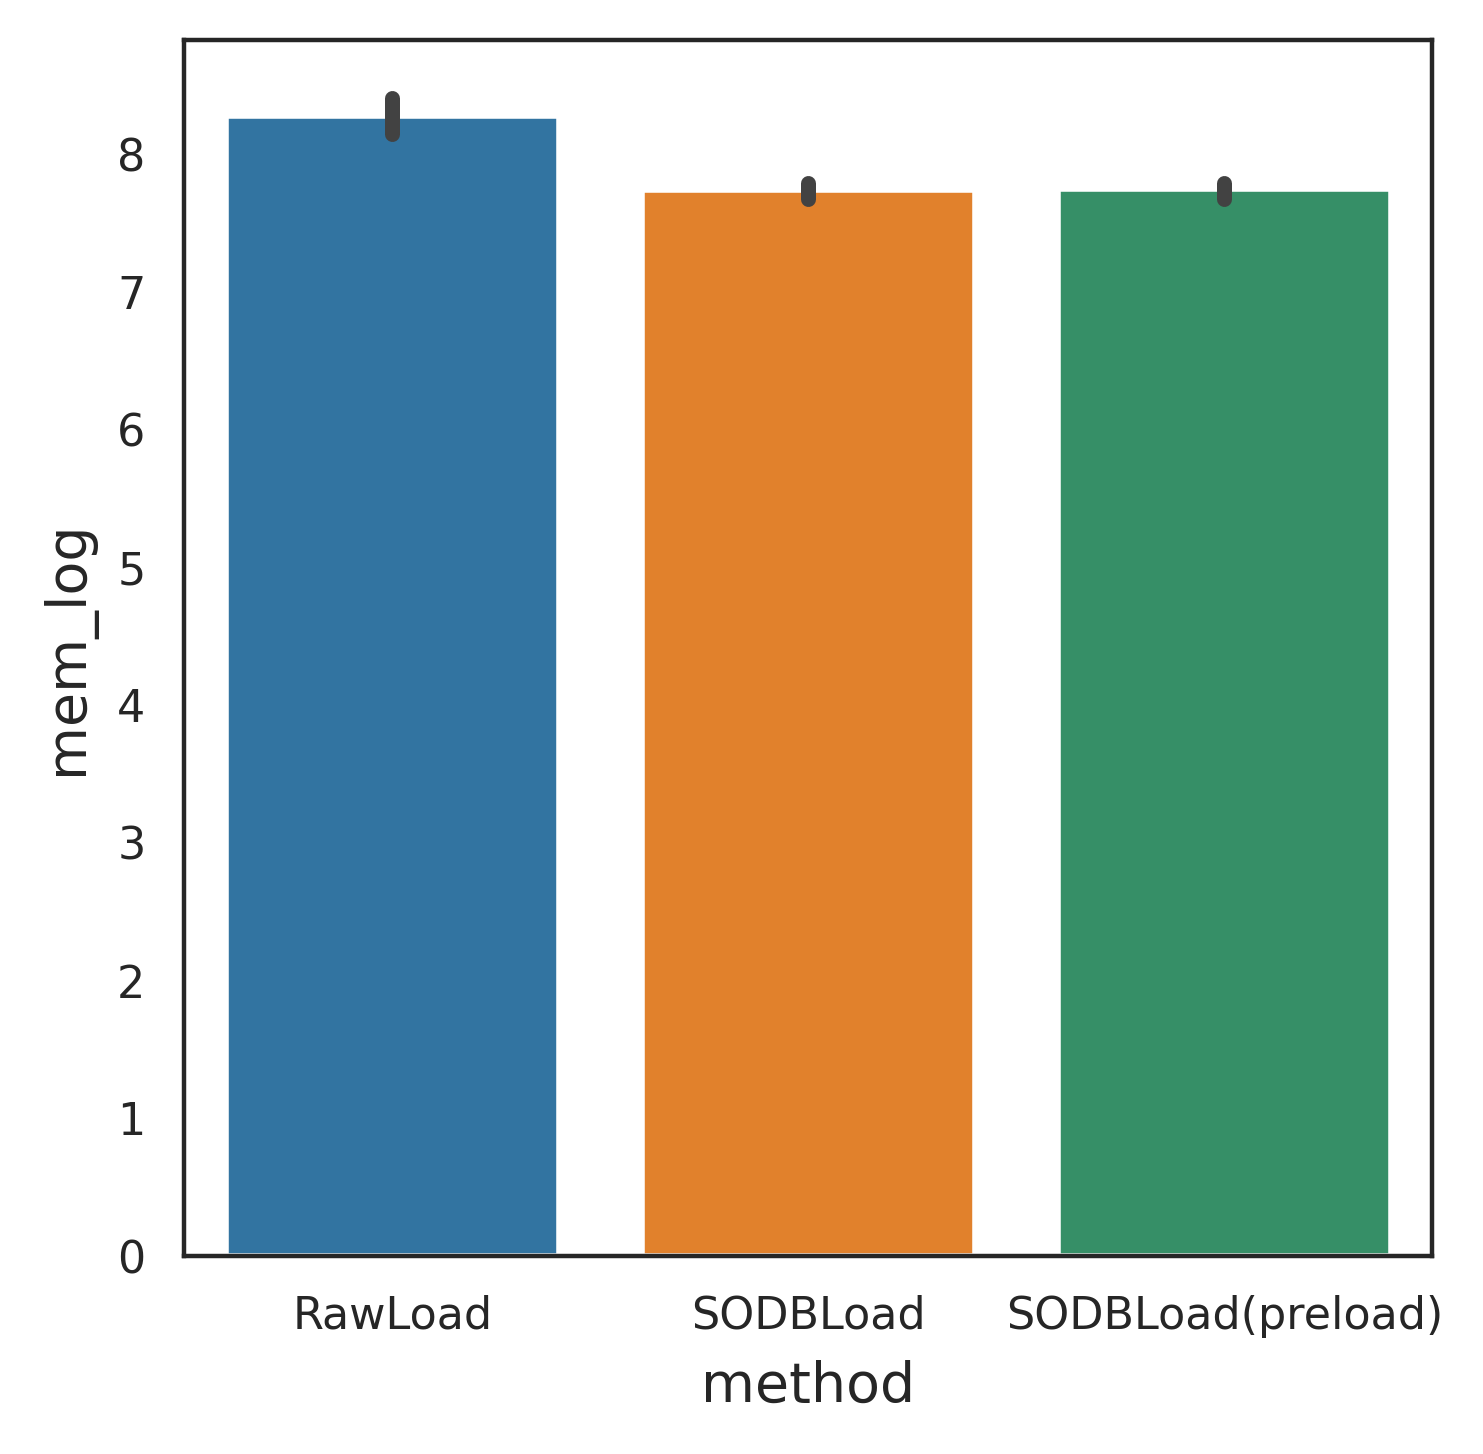

In [139]:
sns.barplot(data=pd_df,x='method',y='mem_log')

<AxesSubplot:xlabel='method', ylabel='time'>

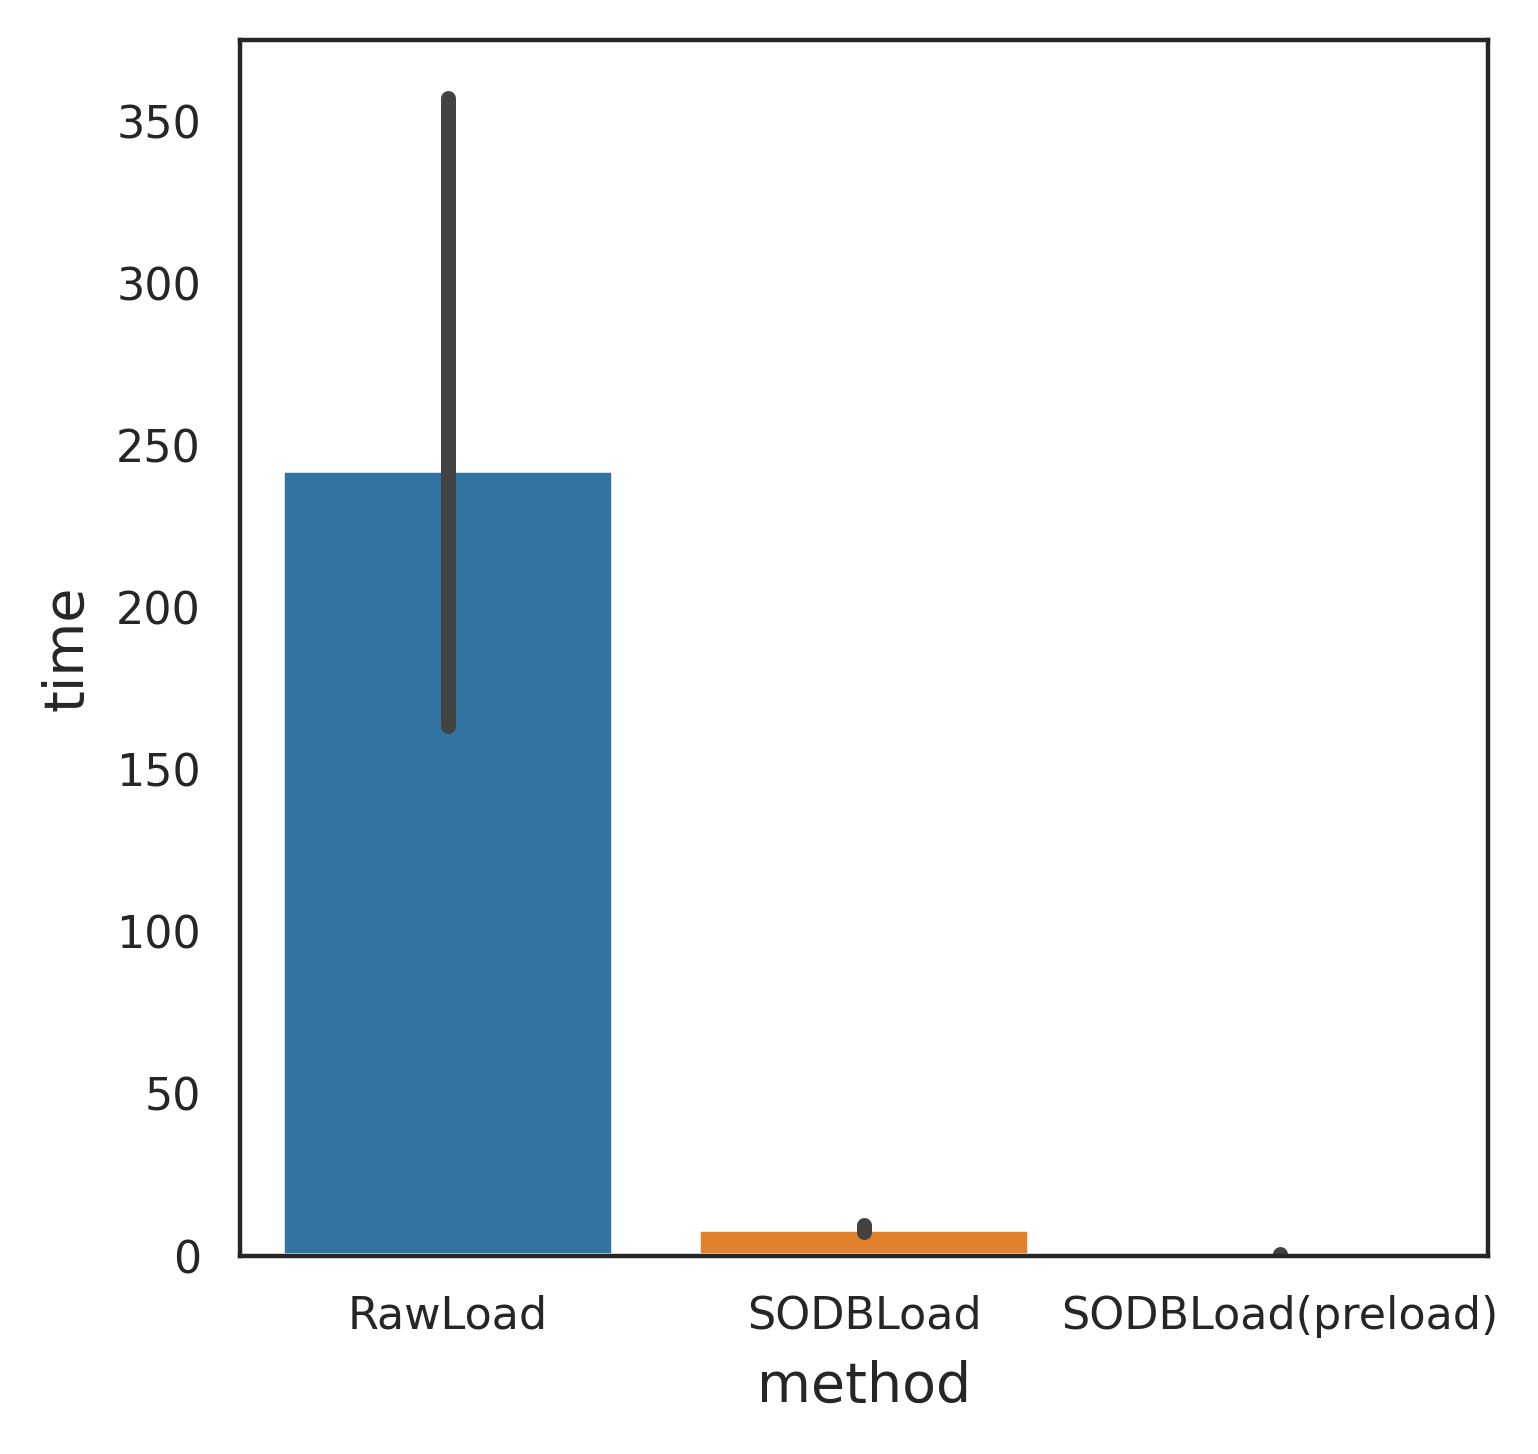

In [140]:
sns.barplot(data=pd_df,x='method',y='time')

In [141]:
pd_df[['time_log']] = np.log10(pd_df[['time']])

<AxesSubplot:xlabel='method', ylabel='time_log'>

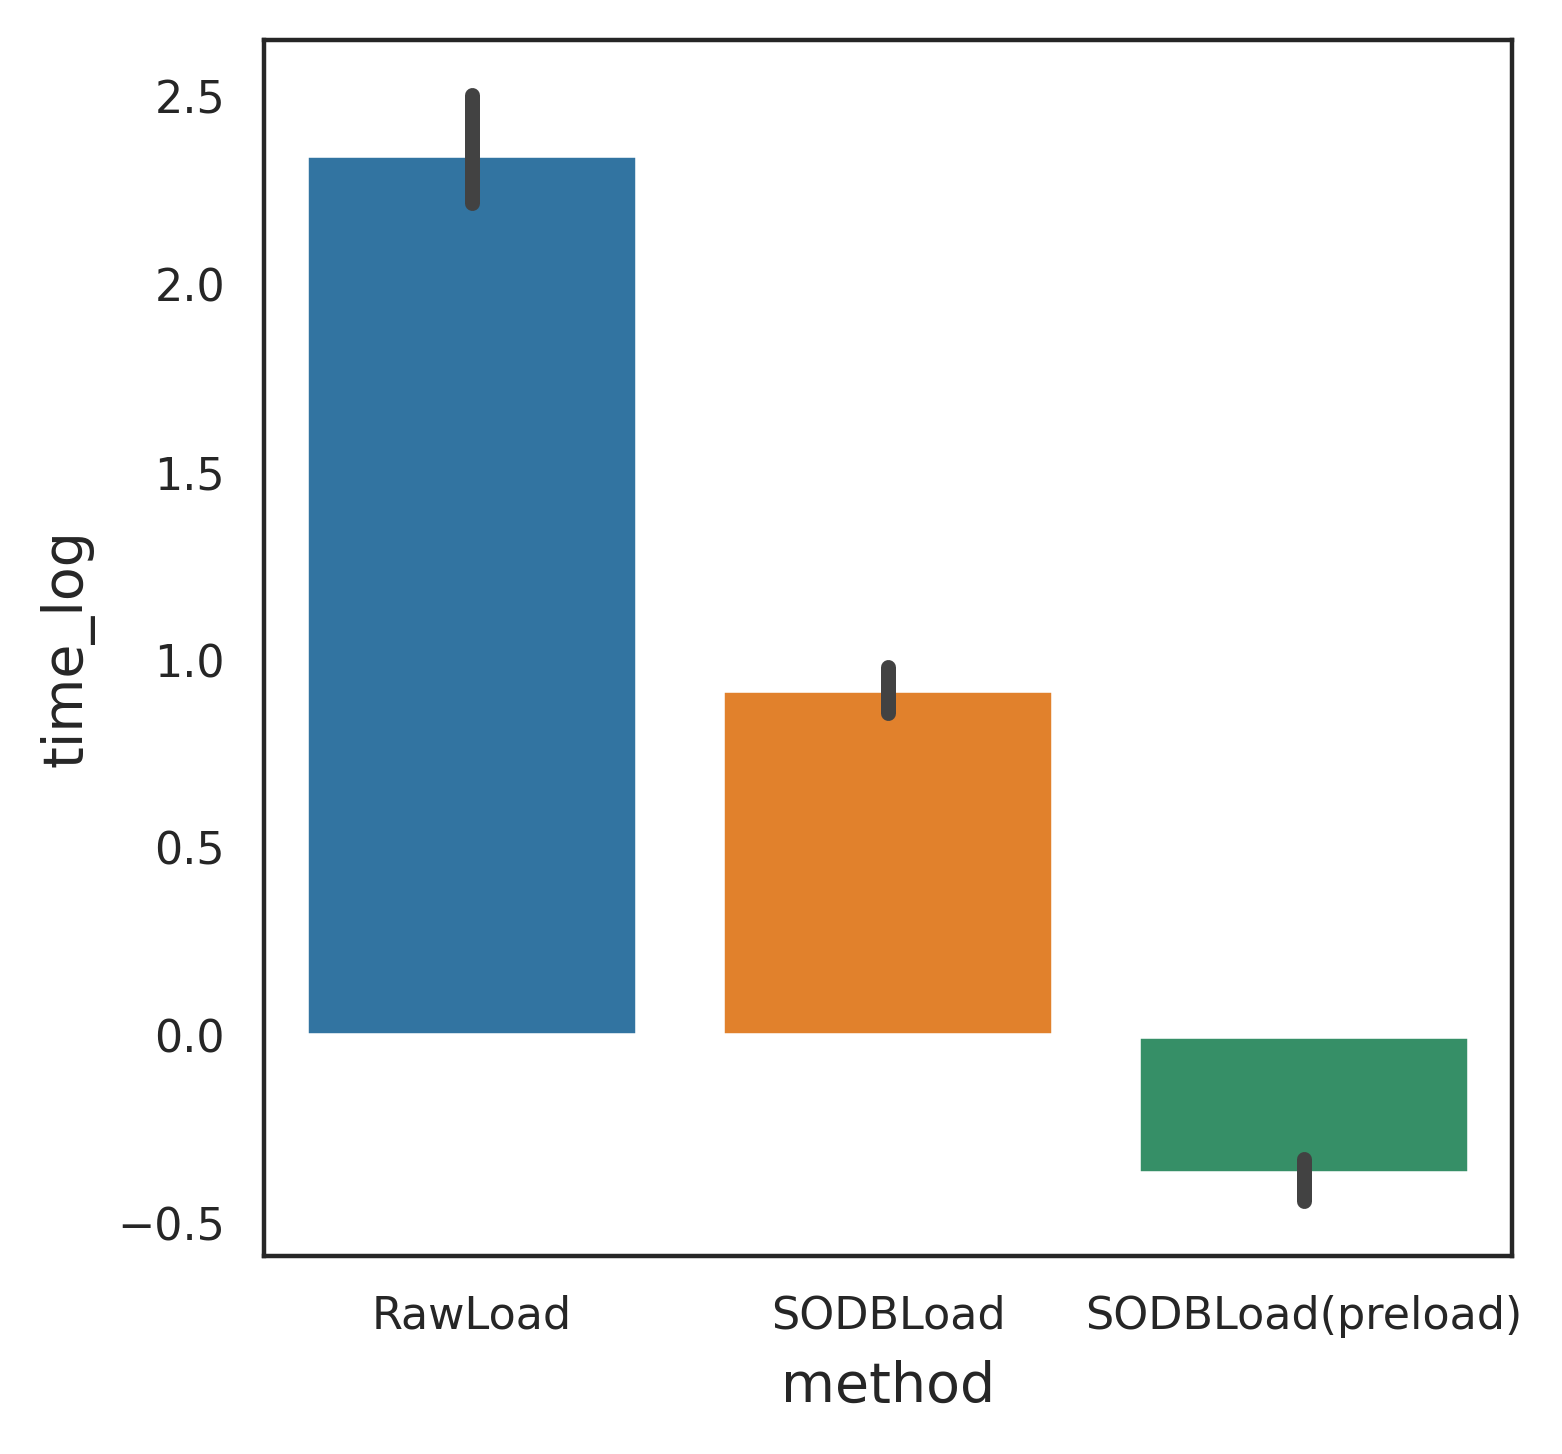

In [142]:
sns.barplot(data=pd_df,x='method',y='time_log')

In [143]:
pd_df[['time_min']] = pd_df[['time']]/60
pd_df[['mem_gb']] = pd_df[['memory']]/1024/1024/1024



In [144]:
pd_df.groupby('method').agg('median')

/tmp/ipykernel_1029308/4287057475.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd_df.groupby('method').agg('median')


,time,memory,mem_log,time_log,time_min,mem_gb
method,,,,,,
RawLoad,193.644152,177054863.5,8.245083,2.282535,3.227403,0.164895
SODBLoad,8.219941,57025459.0,7.756069,0.914869,0.136999,0.053109
SODBLoad(preload),0.458417,58497913.0,7.767140,-0.338739,0.007640,0.054480


In [145]:
pd_df.groupby('method').agg('mean')

/tmp/ipykernel_1029308/2999874510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd_df.groupby('method').agg('mean')


,time,memory,mem_log,time_log,time_min,mem_gb
method,,,,,,
RawLoad,242.564573,2.030399e+08,8.274377,2.343757,4.042743,0.189096
SODBLoad,8.354086,5.530037e+07,7.740244,0.918977,0.139235,0.051502
SODBLoad(preload),0.431019,5.578640e+07,7.743894,-0.368314,0.007184,0.051955


In [1]:
331194876/1000/1000

331.19487599999997